In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib widget
import config

import sys 
sys.path.append('..')

N = 3

from constants import *
from simulation import Simulation
from step import Step

In [2]:
# V = np.random.uniform(-1, 1, (2, N))
# V[0] = np.array([0, 0.6, -0.2, -0.3])
# V[1] = np.array([0.5, -0.05, 1, 1])

# X = np.zeros_like(V) 
# X[0] = np.array([1, 1.6, 1, 1])
# X[1] = np.array([1, 0.3, 1.7, 2])

V = np.random.uniform(-1, 1, (2, N))
V[1] = np.array([0.5, -0.6])
V[0] = -np.array([0.5, 0.6])

X = np.zeros_like(V) 
X[0] = np.array([1.61, 4])
X[1] = np.array([3, 4])

step = Step(X, V, params=dict(N=N, tau=1, Ra=2, phi=200, v0=1, R=12, J=1, eps=0, a=1, b=0))
fig, ax = plt.subplots()

ax.add_patch(plt.Rectangle((0, 0), W, H, fc='none', ec='k'))
ax.quiver(*X, *V, angles='xy', scale_units='xy', scale=1)
ax.scatter(*X)

fwall = step.get_wall_force()
ax.quiver(*X, *fwall, angles='xy', scale_units='xy', scale=1, color='r')

fal = step.get_alignment_force()
ax.quiver(*X, *fal, angles='xy', scale_units='xy', scale=1, color='b')

fatt = step.get_attraction_force()
ax.quiver(*X, *fatt, angles='xy', scale_units='xy', scale=1, color='g')

fprop = step.get_propulsion_force()
ax.quiver(*X, *fprop, angles='xy', scale_units='xy', scale=1, color='c')

# ax.add_patch(plt.Rectangle((0, 0), W, H, fc='none', ec='k'))
ax.axis('equal')
ax.axis([0, H, 0, W])





ValueError: could not broadcast input array from shape (2,) into shape (3,)

In [3]:
fatt

NameError: name 'fatt' is not defined

In [4]:
self = step 

thetaij = np.abs(np.arccos(np.einsum("im,inm->mn", 
                                                  self.V / self.Vnorm, -self.Xij / self.rij)))

np.fill_diagonal(thetaij, 0) 
thetaij

NameError: name 'step' is not defined

(0.0, 2.0, 0.0, 2.0)

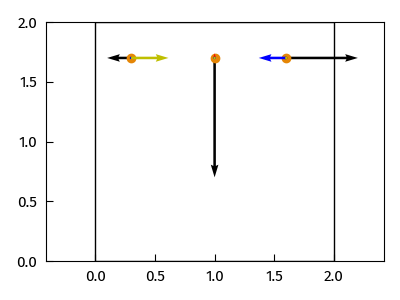

In [5]:
V = np.random.uniform(-1, 1, (2, N))


V[0] = np.array([-0.2, 0, 0.6])
V[1] = np.array([0, -1, 0])

Vnorm = np.linalg.norm(V, axis=0)

H = 2
W = 2

X = np.zeros_like(V) 
X[0] = np.array([0.3, 1, 1.6])
X[1] = 2 - np.array([0.3, 0.3, 0.3])

fig, ax = plt.subplots()
ax.quiver(X[0], X[1], V[0], V[1], angles='xy', scale_units='xy', scale=1)
ax.scatter(X[0], X[1])

dN = H - X[1] 
dS = X[1] 
dE = W - X[0] 
dW = X[0]


nN = np.r_[0,  1]
nS = np.r_[0, -1]
nE = np.r_[ 1, 0]
nW = np.r_[-1, 0]

FN = ((- np.maximum((1 / dN - 1 / delta), 0) * nN[..., None]).T * np.maximum(np.dot((V / Vnorm).T, nN[..., None]), 0)).T /10

FS = ((- np.maximum((1 / dS - 1 / delta), 0) * nS[..., None]).T * np.maximum(np.dot((V / Vnorm).T, nS[..., None]), 0)).T /10

FE = ((- np.maximum((1 / dE - 1 / delta), 0) * nE[..., None]).T * np.maximum(np.dot((V / Vnorm).T, nE[..., None]), 0)).T /10

FW = ((- np.maximum((1 / dW - 1 / delta), 0) * nW[..., None]).T * np.maximum(np.dot((V / Vnorm).T, nW[..., None]), 0)).T /10

ax.quiver(X[0], X[1], FS[0], FS[1], angles='xy', scale_units='xy', scale=1, color='r')
ax.quiver(X[0], X[1], FN[0], FN[1], angles='xy', scale_units='xy', scale=1, color='g')
ax.quiver(X[0], X[1], FE[0], FE[1], angles='xy', scale_units='xy', scale=1, color='b')
ax.quiver(X[0], X[1], FW[0], FW[1], angles='xy', scale_units='xy', scale=1, color='y')

ax.add_patch(plt.Rectangle((0, 0), W, H, fc='none', ec='k'))
ax.axis('equal')
ax.axis([0, H, 0, W])





In [8]:
X.shape

(2, 2)

In [9]:
(- np.maximum((1 / dN - 1 / delta), 0) * nN[..., None]).shape

NameError: name 'dN' is not defined

In [103]:
((- np.maximum((1 / dN - 1 / delta), 0) * nN[..., None]).T * np.maximum(np.dot((V / Vnorm).T, nN[..., None]), 0)).shape

(3, 2)

In [104]:
((- np.maximum((1 / dN - 1 / delta), 0) * nN[..., None]).T * np.maximum(np.dot((V / Vnorm).T, nN[..., None]), 0)).T / 10

array([[-0., -0., -0.],
       [-0., -0., -0.]])

In [22]:
Vnorm

array([0.1, 0.1, 1. ])

In [33]:
V = np.random.uniform(-1, 1, (2, 5))

In [35]:
Vnorm = np.linalg.norm(V, axis=0)

In [37]:
V/Vnorm

array([1., 1., 1., 1., 1.])